In [12]:
from langgraph.graph import StateGraph,START,END
from typing_extensions import TypedDict

In [5]:
# define state
class BMIstate(TypedDict):
    weight_kg:float
    height:float
    bmi:float

In [9]:
def bmi_calculator(state:BMIstate) -> BMIstate:

    bmi = state["weight_kg"] / (state["height"] ** 2)
    state["bmi"] = round(bmi, 2)
    return state

In [13]:
graph = StateGraph(BMIstate)

graph.add_node("bmi_calculator", bmi_calculator)

graph.add_edge(START, "bmi_calculator")
graph.add_edge("bmi_calculator", END)


workflow=graph.compile()

In [15]:
initial_state = {"weight_kg": 70, "height": 1.75}
final_state = workflow.invoke(initial_state)

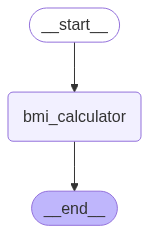

In [17]:
from IPython.display import Image

Image(data=workflow.get_graph().draw_mermaid_png())
